# Observations
    

# as of the date and time the code was exuted,
            # the max temperatures are in the cities close to the Equator.
            # the temperatures in the Northern Hemispher are  decreasing from the equator to the hiher Latitude.
            # the temperatures in the southern Hemispher are  increasing from the Lowest latitude toards the equator.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List¶

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

# Perform API Calls¶
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
#Get the Weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

#print(json.dumps(weather_json, indent=4))
#print(requests.get(query_url+city))

# Set Up Lists to Hold Reponse Info
city_name = []
latitude= []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:
   
     
# Exception Handling
    try:
        response = requests.get(query_url+ city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(pd.to_datetime(response["dt"],unit='s'))
        current_city = response["name"]
        print(f"Processing Record {processing_record}| {current_city}")
    
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
          
    except:
        print("City not found next ...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1| Saskylakh
Processing Record 2| Casa Nova
Processing Record 3| Tuktoyaktuk
Processing Record 4| Bud
Processing Record 5| Mbabane
Processing Record 6| Nishihara
Processing Record 7| Bonavista
Processing Record 8| Ungaran
Processing Record 9| Rikitea
Processing Record 10| Kapaa
Processing Record 11| Kaitangata
Processing Record 12| Dongli
Processing Record 13| Tasiilaq
Processing Record 14| Port Alfred
Processing Record 15| Albany
Processing Record 16| San Patricio
Processing Record 17| Cape Town
Processing Record 18| Laguna
Processing Record 19| Busselton
Processing Record 20| Lavrentiya
Processing Record 21| Buta
Processing Record 22| Caucaia
Processing Record 23| Iqaluit
Processing Record 24| Saint Paul Harbor
Processing Record 25| Kadaň
Processing Record 26| Nizhnyaya Tavda
Processing Record 27| Lianzhou
Processing Record 28| Bunia
Processing Record 29| New Norfolk
Processing Record 30| Hermanus
Processing R

Processing Record 238| Ayan
Processing Record 239| Enid
Processing Record 240| Mossamedes
Processing Record 241| Bima
Processing Record 242| Kruisfontein
Processing Record 243| Batemans Bay
Processing Record 244| Mīzan Teferī
Processing Record 245| Ponta Delgada
Processing Record 246| Cururupu
Processing Record 247| Owatonna
Processing Record 248| Longyearbyen
Processing Record 249| Taseyevo
Processing Record 250| Nuuk
Processing Record 251| Vila do Maio
City not found next ...
Processing Record 252| Aasiaat
Processing Record 253| Evensk
Processing Record 254| Muli
City not found next ...
Processing Record 255| Henties Bay
Processing Record 256| Geraldton
City not found next ...
Processing Record 257| Davila
Processing Record 258| Vanimo
Processing Record 259| Tadine
Processing Record 260| Olinda
Processing Record 261| Talnakh
City not found next ...
Processing Record 262| Hearst
City not found next ...
Processing Record 263| Desaguadero
Processing Record 264| Puerto Ayora
Processing R

Processing Record 477| Kieta
Processing Record 478| Coos Bay
Processing Record 479| Belmonte
Processing Record 480| Porto-Novo
Processing Record 481| Saldanha
Processing Record 482| Bendigo
Processing Record 483| San Juan del Sur
Processing Record 484| Zhangjiakou
Processing Record 485| Harper
Processing Record 486| Wajima
Processing Record 487| Banff
Processing Record 488| Abu Samrah
Processing Record 489| Naze
Processing Record 490| Acapulco de Juárez
Processing Record 491| Mahon
City not found next ...
Processing Record 492| Lixouri
Processing Record 493| Falkenberg
Processing Record 494| Mabaruma
Processing Record 495| Kandrian
City not found next ...
Processing Record 496| Paidha
Processing Record 497| Jutaí
Processing Record 498| Sungai Raya
Processing Record 499| Kondinskoye
Processing Record 500| Broome
Processing Record 501| Rantepao
Processing Record 502| Sur
Processing Record 503| Būlaevo
Processing Record 504| Guaíra
Processing Record 505| Pitimbu
Processing Record 506| Tou

# Convert Raw Data to DataFrame¶
#Export the city data into a .csv.
#Display the DataFrame

In [4]:
weather_df = pd.DataFrame({"City":city_name, "Latitude":latitude, "Longitude":longitude,
    "Maximum Temperature": max_temperature,"Humidity %":humidity, "Cloudiness %": cloudiness
   ,"Wind Speed(mph)": wind_speed,"Country":country,"Date":date})

weather_df

,City,Latitude,Longitude,Maximum Temperature,Humidity %,Cloudiness %,Wind Speed(mph),Country,Date
0,Saskylakh,71.92,114.08,-22.77,89,7,3.61,RU,2020-11-08 01:09:26
1,Casa Nova,-9.42,-41.13,27.24,63,0,8.27,BR,2020-11-08 01:09:27
2,Tuktoyaktuk,69.45,-133.04,-3.00,79,40,8.70,CA,2020-11-08 01:09:27
3,Bud,39.45,-86.18,12.22,71,1,2.36,US,2020-11-08 01:09:27
4,Mbabane,-26.32,31.13,20.83,46,0,2.08,SZ,2020-11-08 01:09:27
...,...,...,...,...,...,...,...,...,...
571,Oistins,13.07,-59.53,27.00,83,20,8.70,BB,2020-11-08 01:11:50
572,Tamandaré,-8.76,-35.10,25.22,82,17,5.25,BR,2020-11-08 01:10:32
573,Nhulunbuy,-12.23,136.77,32.00,59,75,6.70,AU,2020-11-08 01:11:51
574,Shepetivka,50.19,27.06,5.78,94,0,2.45,UA,2020-11-08 01:11:51


In [5]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"
weather_df.to_csv(output_data_file)

# Inspect the data and remove the cities where the humidity > 100%.¶
# Skip this step if there are no cities that have humidity > 100%.

In [6]:
weather_humidity_inspected = weather_df.loc[weather_df["Humidity %"] <= 100 , :]
weather_humidity_inspected

,City,Latitude,Longitude,Maximum Temperature,Humidity %,Cloudiness %,Wind Speed(mph),Country,Date
0,Saskylakh,71.92,114.08,-22.77,89,7,3.61,RU,2020-11-08 01:09:26
1,Casa Nova,-9.42,-41.13,27.24,63,0,8.27,BR,2020-11-08 01:09:27
2,Tuktoyaktuk,69.45,-133.04,-3.00,79,40,8.70,CA,2020-11-08 01:09:27
3,Bud,39.45,-86.18,12.22,71,1,2.36,US,2020-11-08 01:09:27
4,Mbabane,-26.32,31.13,20.83,46,0,2.08,SZ,2020-11-08 01:09:27
...,...,...,...,...,...,...,...,...,...
571,Oistins,13.07,-59.53,27.00,83,20,8.70,BB,2020-11-08 01:11:50
572,Tamandaré,-8.76,-35.10,25.22,82,17,5.25,BR,2020-11-08 01:10:32
573,Nhulunbuy,-12.23,136.77,32.00,59,75,6.70,AU,2020-11-08 01:11:51
574,Shepetivka,50.19,27.06,5.78,94,0,2.45,UA,2020-11-08 01:11:51


In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_high_humidity = weather_df.loc[weather_df["Humidity %"] > 100 , :]
indices_high_humidity = weather_high_humidity.index.values
print(indices_high_humidity)

[]


In [8]:

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.drop (indices_high_humidity, inplace=True)
weather_df

,City,Latitude,Longitude,Maximum Temperature,Humidity %,Cloudiness %,Wind Speed(mph),Country,Date
0,Saskylakh,71.92,114.08,-22.77,89,7,3.61,RU,2020-11-08 01:09:26
1,Casa Nova,-9.42,-41.13,27.24,63,0,8.27,BR,2020-11-08 01:09:27
2,Tuktoyaktuk,69.45,-133.04,-3.00,79,40,8.70,CA,2020-11-08 01:09:27
3,Bud,39.45,-86.18,12.22,71,1,2.36,US,2020-11-08 01:09:27
4,Mbabane,-26.32,31.13,20.83,46,0,2.08,SZ,2020-11-08 01:09:27
...,...,...,...,...,...,...,...,...,...
571,Oistins,13.07,-59.53,27.00,83,20,8.70,BB,2020-11-08 01:11:50
572,Tamandaré,-8.76,-35.10,25.22,82,17,5.25,BR,2020-11-08 01:10:32
573,Nhulunbuy,-12.23,136.77,32.00,59,75,6.70,AU,2020-11-08 01:11:51
574,Shepetivka,50.19,27.06,5.78,94,0,2.45,UA,2020-11-08 01:11:51


# Plotting the Data¶
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs

# Latitude vs. Temperature Plot

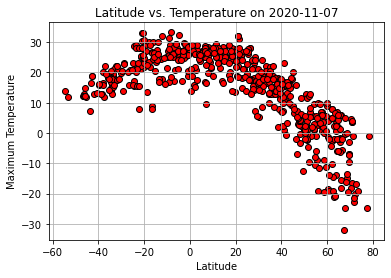

In [10]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties
from datetime import datetime
plt.scatter(weather_df["Latitude"],weather_df["Maximum Temperature"], facecolors="red", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Temperature on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(True)

# Save Figure
plt.savefig("output_data/City_Latitude_vs_Max_Temperature.png")

plt.show()

# Latitude vs. Humidity Plot

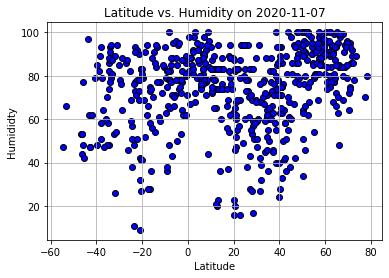

In [11]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

plt.scatter(weather_df["Latitude"],weather_df["Humidity %"],facecolors="blue", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Humidity on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humididty")
plt.grid(True)

# Save Figure
plt.savefig("output_data/City_Latitude_vs_Humidity.png")


plt.show()

# Latitude vs. Cloudiness Plot

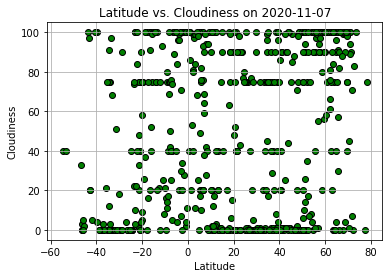

In [12]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

plt.scatter(weather_df["Latitude"],weather_df["Cloudiness %"],facecolors="green", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Cloudiness on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save Figure
plt.savefig("output_data/City_Latitude_vs_Cloudiness.png")


plt.show()

# Latitude vs. Wind Speed Plot

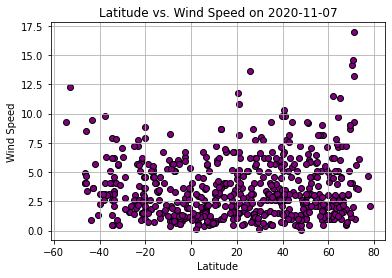

In [13]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed(mph)"],facecolors="purple", marker="o", edgecolor="black")
plt.title(f"Latitude vs. Wind Speed on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save Figure
plt.savefig("output_data/City_Latitude_vs_Wind_Speed.png")


plt.show()

# Linear Regression

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.55x + 32.06


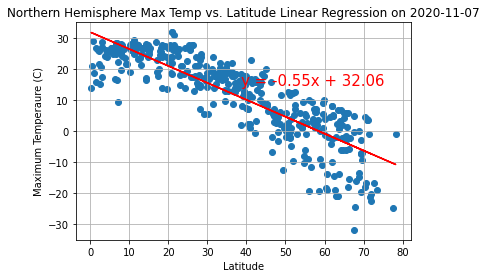

In [14]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

#Extraction of Northern Hemisphere Data
northern_hemisphere = weather_df.loc[weather_df["Latitude"]>0]
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Maximum Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Max Temp vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperaure (C)")
plt.grid(True)


# Save Figure
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.29x + 27.88


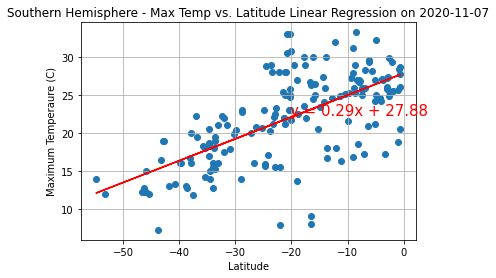

In [15]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

#Extraction of Northern Hemisphere Data
southern_hemisphere = weather_df.loc[weather_df["Latitude"]<0]
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Maximum Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperaure (C)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


print(line_eq)
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.18x + 69.36


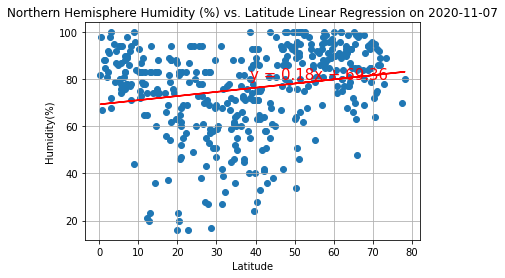

In [16]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = northern_hemisphere["Humidity %"]
x_values =  northern_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Humidity (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.27x + 75.94


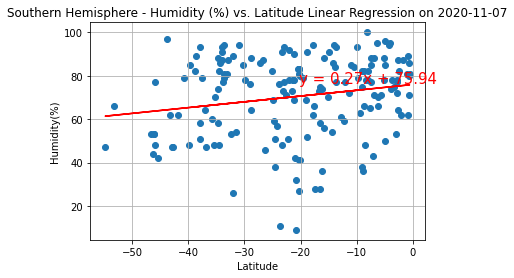

In [17]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = southern_hemisphere["Humidity %"]
x_values =  southern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.43x + 32.87


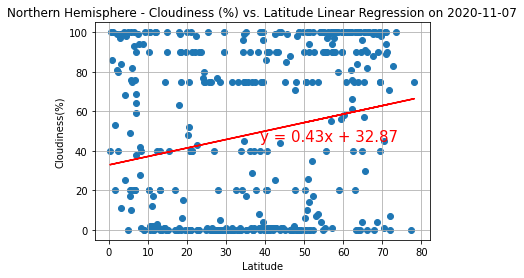

In [18]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = northern_hemisphere["Cloudiness %"]
x_values =  northern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.01x + 64.39


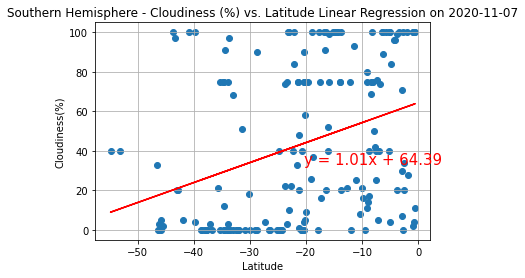

In [19]:
#Build Scatter Plot for Each Data Type
# Incorporate Other Graph Properties

y_values = southern_hemisphere["Cloudiness %"]
x_values = southern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")


plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x + 2.69


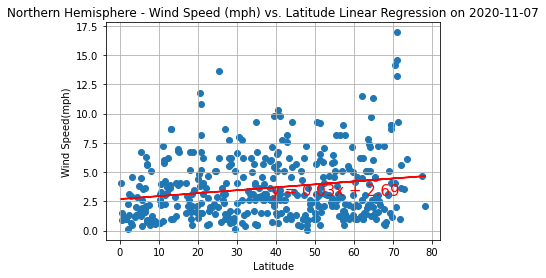

In [20]:
y_values = northern_hemisphere["Wind Speed(mph)"]
x_values = northern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")


plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/Northern Hemisphere - WindSpeed(mph)) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.05x + 2.53


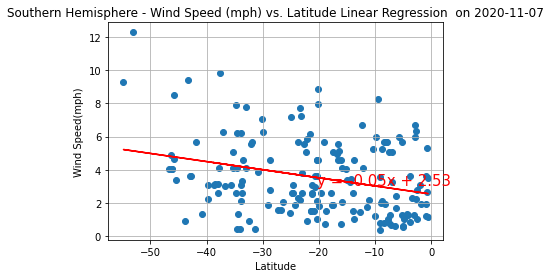

In [21]:
y_values = southern_hemisphere["Wind Speed(mph)"]
x_values = southern_hemisphere["Latitude"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")


plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression  on {datetime.today().date()}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# Save Figure
plt.savefig("output_data/Southern Hemisphere - WindSpeed(mph)) vs. Latitude Linear Regression.png")

print(line_eq)
plt.show()